# Import Libraries

<blockquote>Most of the libraries present in the lib folder. However to run XGBoost and SMOTE please install the <b>xgboost and imblearn</b> packages in the environment using pip command.</blockquote>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
import xgboost as xgb

# Data upload and preparation

In [49]:
data = pd.read_csv("final.csv")

In [50]:
index = data.index
number_of_rows = len(index)
print(number_of_rows)

1810815


In [51]:
data.head(5)

,v6392,v0223,v0020,v0026,v0027,v0157,v0165,v0354,v0628,v0881,...,v5740,v5812,v6296,v6302,v6353,v6362,v6367,v6372,v6379,v6400
0,1.0,0.4,0.0,0.1667,0.0000,76000.0,1.0,2.0000,18.8599,7.0,...,-0.0219,-1.5603,14.0,3.0,95.0,76.0500,88.0,88.0,88.0,1.019
1,0.0,0.7,1.0,0.0000,0.0714,74000.0,3.0,1.6667,92.1743,11.0,...,0.0501,-1.4895,10.0,3.0,98.0,69.4615,108.0,108.0,108.0,0.900
2,0.0,0.7,0.0,0.0000,0.1250,74800.0,2.0,2.6667,43.5679,13.0,...,-0.2432,-1.4944,20.0,3.0,87.0,69.8636,24.0,24.0,24.0,0.900
3,1.0,0.4,1.0,0.0000,0.2143,79000.0,4.0,3.6667,31.6006,7.0,...,0.0626,-0.4170,15.0,5.0,80.0,67.0556,84.0,84.0,84.0,0.992
4,0.0,0.6,1.0,0.0714,-0.3182,82000.0,7.0,4.6667,94.8916,14.0,...,0.0223,-0.0662,13.0,1.0,74.0,61.9412,79.0,19.0,79.0,0.900


In [52]:
x = data.iloc[:, data.columns != 'v6392']
y = data.iloc[:, data.columns == 'v6392']

# Important Disclaimer

<blockquote>Run <b>Logistic oversample, Random Forest oversample, XGBoost oversample</b> at one go. Run <b>Logistic on actual, RF on actual plus class weight and XGB on actual plus class weight</b> at another go</blockquote>

# Undersampling imbalance data

In [53]:
number_records_fraud = len(data[data.v6392 == 1])
fraud_indices = np.array(data[data.v6392 == 1].index)
normal_indices = np.array(data[data.v6392 == 0].index)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]
x_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'v6392']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'v6392']
print("percentage of normal transaction: ", len(under_sample_data[under_sample_data.v6392 == 0])/len(under_sample_data))
print("percentage of fraud transaction: ", len(under_sample_data[under_sample_data.v6392 == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

percentage of normal transaction:  0.5
percentage of fraud transaction:  0.5
Total number of transactions in resampled data:  603872


# Logistic Regression with undersample/original data

In [54]:
features = x # Change x to x_undersample for undersample data
target = y # Change y to y_undersample for undersample data

x_train, x_test, y_train, y_test = train_test_split(features, target, stratify = target, test_size = 0.3, random_state = 1)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
LR_pred = lr_model.predict(x_test)

In [55]:
accuracy_score(y_test, LR_pred)

0.8332501909819695

In [56]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91    452664
         1.0       0.37      0.00      0.00     90581

    accuracy                           0.83    543245
   macro avg       0.60      0.50      0.45    543245
weighted avg       0.76      0.83      0.76    543245



# Oversampling

In [57]:
features = data.iloc[:, under_sample_data.columns != 'v6392']
target = data.iloc[:, under_sample_data.columns == 'v6392']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 1)

oversample = SMOTE(random_state = 2)
x_train_os, y_train_os = oversample.fit_sample(x_train, y_train)

# Logistic Regression oversampled data

In [58]:
x_train = x_train_os
y_train = y_train_os
#columns = x_train.columns

#x_train = StandardScaler().fit_transform(x_train)
#x_train = pd.DataFrame(x_train, columns = list(columns))

LR = LogisticRegression()

LR.fit(x_train, y_train)
LR_pred_score = LR.predict_proba(x_test)
LR_pred = LR.predict(x_test)

## Logistic output

In [59]:
print(confusion_matrix(y_test, LR_pred))

[[258248 194342]
 [ 39066  51589]]


In [60]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69    452590
         1.0       0.21      0.57      0.31     90655

    accuracy                           0.57    543245
   macro avg       0.54      0.57      0.50    543245
weighted avg       0.76      0.57      0.62    543245



In [61]:
LR.score(x_test, y_test)

0.5703448720190706

In [62]:
LR_pred_score = pd.DataFrame(LR_pred_score[:,1])
roc_auc_score(y_test, LR_pred_score)

0.5989065060698472

# RFE

In [63]:
rfe = RFE(LR, 25) # The 25 was selected by me. Please select the number of variables you want
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True False False  True  True  True
  True  True  True False False False False False  True  True False  True
  True False  True False  True  True  True  True  True  True  True False
 False False False False False False  True]
[ 1  1  1  1 19  1  1 18  8  1  1  1  1  1  1 17  3 10  9 14  1  1  2  1
  1  7  1 13  1  1  1  1  1  1  1  6  5  4 16 12 11 15  1]


# Logistic Regression explanatory model

In [64]:
x_train_imp = x_train.drop(list(x_train.columns[rfe.ranking_ != 1]), axis = 1)
x_train_imp = x_train_imp.drop(['v5339'], axis = 1) # This variable was dropped after checking p-value

logit_model = sm.Logit(y_train, x_train_imp)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573218
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.173       
Dependent Variable: v6392            AIC:              2421982.1505
Date:               2020-10-05 12:41 BIC:              2422283.6725
No. Observations:   2112578          Log-Likelihood:   -1.2110e+06 
Df Model:           23               LL-Null:          -1.4643e+06 
Df Residuals:       2112554          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     6.0000                                         
---------------------------------------------------------------------
           Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
---------------------------------------------------------------------
v0223     -0.0584     0.0055    -10.6465   0.0000   -0.0691   -0.0476
v0020      0.3922     0.0042     

# Random Forest oversampled data

In [65]:
RF = RandomForestClassifier(n_estimators = 6)

RF.fit(x_train, y_train)
RF_pred_score = RF.predict_proba(x_test)
RF_pred = RF.predict(x_test)

# Random Forest with class weight and parameters

<blockquote>The goal of this particular problem to accurately select the imbalance class. Imbalance class may occur in many places including credit card fraud, malignant growth detection etc. One of the technique to handle imbalance class is to sythetic sampling. However synthetic sampling means information manipulation. Hence class weigtage method is being used here.</blockquote>

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
class_weight = dict({0:1, 1:5}) # The ratio of 0:1 is 5:1. Hence the weight ratio is 1:5.
RF = RandomForestClassifier(bootstrap=True,
            class_weight=class_weight, 
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=6,
            oob_score=False,
            random_state=1,
            verbose=0, warm_start=False)
RF.fit(x_train, y_train)
RF_pred_score = RF.predict_proba(x_test)
RF_pred = RF.predict(x_test)

## Output of RF (Run any one of the above two)

In [67]:
print(confusion_matrix(y_test, RF_pred))

[[288330 164260]
 [ 23278  67377]]


In [68]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.75    452590
         1.0       0.29      0.74      0.42     90655

    accuracy                           0.65    543245
   macro avg       0.61      0.69      0.59    543245
weighted avg       0.82      0.65      0.70    543245



In [69]:
print(RF.score(x_test, y_test))
print(RF.score(x_train, y_train))

0.6547819123968007
0.65493108861838


In [70]:
RF_pred_score = pd.DataFrame(RF_pred_score[:,1])
roc_auc_score(y_test, RF_pred_score)

0.7546576568847254

# XGB oversampeled data

In [71]:
XGB = xgb.XGBClassifier(n_estimators = 100)

XGB.fit(x_train, y_train)
xgb_pred_score = XGB.predict_proba(x_test)
xgb_pred = XGB.predict(x_test)

# XGBoost on original data with class weight

<blockquote>Unlike RF which is a bagging technique boosting is a sequencial process. It creates tree based on the prior knowledge and thus reducing error. Boosting can also include class weight as one of the parameter. Hence suitable for this scenario.</blockquote>

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
XGB = xgb.XGBClassifier(learning_rate=0.001,
                        max_depth = 1, 
                        n_estimators = 100,
                        scale_pos_weight=5) # class weight
XGB.fit(x_train, y_train)
xgb_pred_score = XGB.predict_proba(x_test)
xgb_pred = XGB.predict(x_test)

## XGB output

In [73]:
print(XGB.score(x_test, y_test))
print(XGB.score(x_train, y_train))

0.5497685206490626
0.5488525288544223


In [74]:
print(confusion_matrix(y_test, xgb_pred))

[[221988 230602]
 [ 13984  76671]]


In [75]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.49      0.64    452590
         1.0       0.25      0.85      0.39     90655

    accuracy                           0.55    543245
   macro avg       0.60      0.67      0.52    543245
weighted avg       0.83      0.55      0.60    543245



In [76]:
xgb_pred_score = pd.DataFrame(xgb_pred_score[:,1])
roc_auc_score(y_test, xgb_pred_score)

0.7174412377765877

# ROC curve of all the models

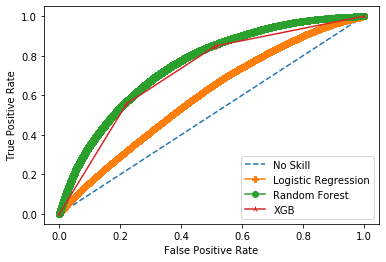

In [77]:
ns_probs = [0 for _ in range(len(y_test))]

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, LR_pred_score)
rf_fpr, rf_tpr, _ = roc_curve(y_test, RF_pred_score)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred_score)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='P', label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, marker='2', label='XGB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.savefig('fig1.pdf')
plt.show()

# Classification Report of all the model

In [80]:
print('Logistic Regression Model Performance')
print(classification_report(y_test, LR_pred))
print('Random Forest Model Performance')
print(classification_report(y_test, RF_pred))
print('XGBoost Model Performance')
print(classification_report(y_test, xgb_pred))

Logistic Regression Model Performance
              precision    recall  f1-score   support

         0.0       0.87      0.57      0.69    452590
         1.0       0.21      0.57      0.31     90655

    accuracy                           0.57    543245
   macro avg       0.54      0.57      0.50    543245
weighted avg       0.76      0.57      0.62    543245

Random Forest Model Performance
              precision    recall  f1-score   support

         0.0       0.93      0.64      0.75    452590
         1.0       0.29      0.74      0.42     90655

    accuracy                           0.65    543245
   macro avg       0.61      0.69      0.59    543245
weighted avg       0.82      0.65      0.70    543245

XGBoost Model Performance
              precision    recall  f1-score   support

         0.0       0.94      0.49      0.64    452590
         1.0       0.25      0.85      0.39     90655

    accuracy                           0.55    543245
   macro avg       0.60      0.6

# Conclusion

<blockquote>The ROC curve for all the models indicate that XGB is a better choice than others. However one may argue that the accuracy of XGB is the worst. Hence we again need to go back to our primary goal. That is to select the model which can capture the anomaly best. In this case if the prediction was all the labels are 0 then the accuracy would be 80%. Sometimes when the imbalance is more prominent then the accuracy may reach to 99% without building any model. Hence accuracy as a metric is unsuitable for these cases. The most important is the <b>recall</b>. We can conclude from the report that recall of XGB is highest. Hence we should consider XGB as the model of choice.</blockquote>